# HW1

##Names:
1. Talya Yermiyahu
2. Alon Meirovich
3. Matan Goldfarb
## ID:
1. 207594193
2. 330181470
3. 314623174

#### Emails:
1. talyayer@post.bgu.ac.il
2. alonmeir@post.bgu.ac.il
3. golmatan@post.bgu.ac.il

## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks (50 pts.)
2. Toy regressions tasks (30 pts.)
3. MNIST (binary) classification task (20 pts.)

See the instructions before each section.

## Submission
The deadline for the task is 16.06.2024.
You may work alone or in teams of 2 or 3.

Submission is via Moodle. Submit the **already run** notebook (i.e., with its output, figures, etc.,).

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Regarding Accuracy:
You must reach over 60% on each test set. Other than that, you are **NOT** graded on accuracy.

## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [82]:
### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y


### EX5

def generate_gaussian_data(means, stds, points_per_class=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, (mean, std) in enumerate(zip(means, stds)):
        class_data = np.random.normal(loc=mean, scale=std, size=(points_per_class, len(mean)))
        X.append(class_data)
        y += [i] * points_per_class

    X = np.vstack(X)
    y = np.array(y)
    return X, y

def perform_pca_and_plot(X, y, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Gaussian Data')
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()

def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()



# TODO - your general functions for Section 1

In [83]:
### Your code goes here (you may break this part to more than one cell) ####
### Imports
from torch.utils.data import DataLoader, TensorDataset
import torch

### Preprocessing function ####

def preprocess_data(x, y, device):
    x_tensor = torch.tensor(x, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y).to(device)
    return x_tensor, y_tensor

### Training function ###
def train_model(model, dataLoader, criterion, optimizer, num_epochs, printCount=1):
    training_loss = []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in dataLoader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(dataLoader.dataset)
        training_loss.append(epoch_loss)

        if (epoch + 1) % printCount == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    return model, training_loss


### Plot training loss function ###
def plot_training_loss(training_loss):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(training_loss) + 1), training_loss)
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()


def plot_decision_boundaries(model, X, y):
    model.eval()

    # Convert X and y to PyTorch tensors if they are not already
    if not isinstance(X, torch.Tensor):
        X = torch.tensor(X, dtype=torch.float32)
    if not isinstance(y, torch.Tensor):
        y = torch.tensor(y)

    # Move tensors to the same device as the model
    device = next(model.parameters()).device  # Get device of the model's parameters
    X = X.to(device)
    y = y.to(device)

    # Handle case where X is 1-dimensional (if applicable)
    if X.ndim == 1:
        X = X.reshape(-1, 1)  # Reshape to make it 2-dimensional if it's 1-dimensional

    # Determine plot ranges based on data
    x_min, x_max = X[:, 0].min().cpu().item() - 1, X[:, 0].max().cpu().item() + 1
    y_min, y_max = X[:, 1].min().cpu().item() - 1, X[:, 1].max().cpu().item() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device)  # Move grid to the same device as X

    # Get model predictions
    with torch.no_grad():
        Z = model(grid)
        _, Z = torch.max(Z, 1)
        Z = Z.reshape(xx.shape)

    # Move data back to CPU for plotting with matplotlib
    X = X.cpu().numpy()
    y = y.cpu().numpy()

    # Plot decision boundaries and data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z.cpu().numpy(), alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries and Predicted Labels')
    plt.colorbar()
    plt.show()




### Evaluation function ###
def evaluate_model(mod, x, y):
    mod.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        inputs = x
        labels = y
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        accuracy = correct / len(y) * 100

    print(f'Accuracy on the data: {accuracy:.2f}%')

## EX1

EX1 - after looking at the arrangement of the points, we thought that the model we needed to use was linear, and we were right.
We started to run the model with a higher "lr", but we saw that the smaller learning rate gives a better result.


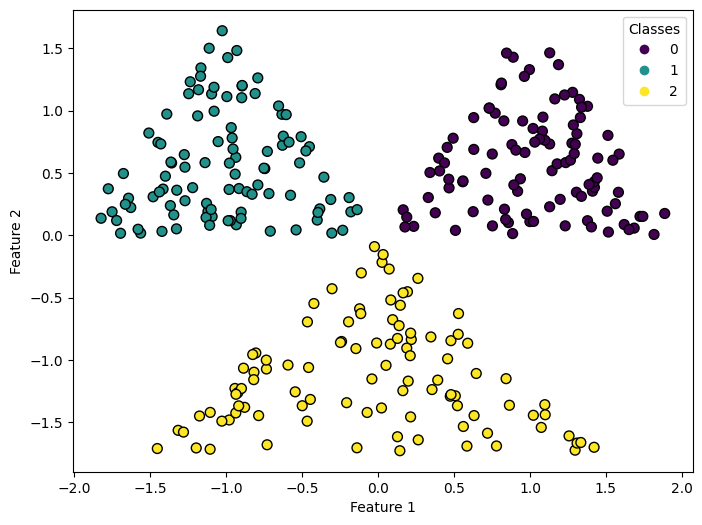

In [84]:
# Generate the data
X_train, y_train = generate_symmetric_triangles_data(random_state=0)
X_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

Epoch [100/1000], Loss: 0.1970
Epoch [200/1000], Loss: 0.1288
Epoch [300/1000], Loss: 0.1010
Epoch [400/1000], Loss: 0.0854
Epoch [500/1000], Loss: 0.0751
Epoch [600/1000], Loss: 0.0677
Epoch [700/1000], Loss: 0.0621
Epoch [800/1000], Loss: 0.0576
Epoch [900/1000], Loss: 0.0540
Epoch [1000/1000], Loss: 0.0510


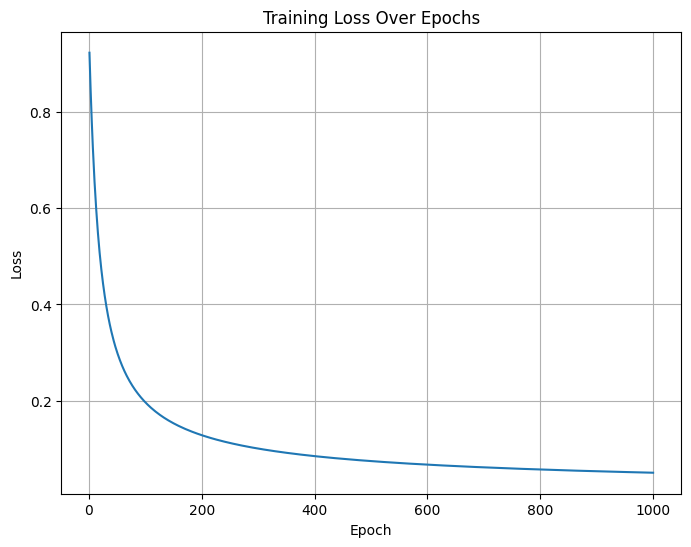


 Train:
Accuracy on the data: 100.00%


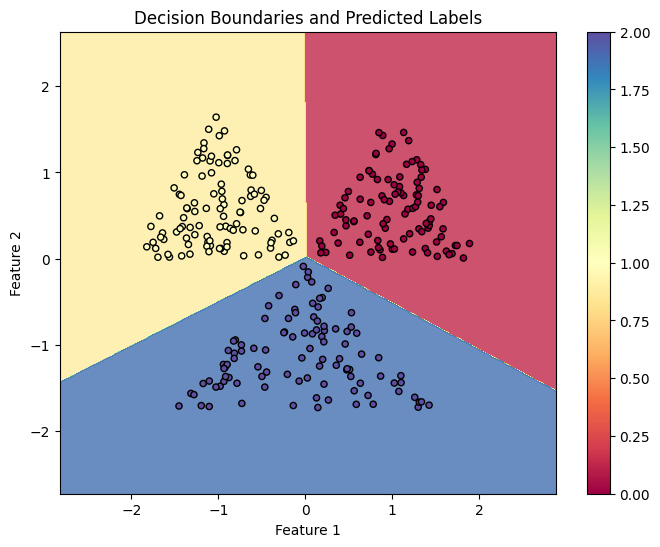


 Test:
Accuracy on the data: 99.67%


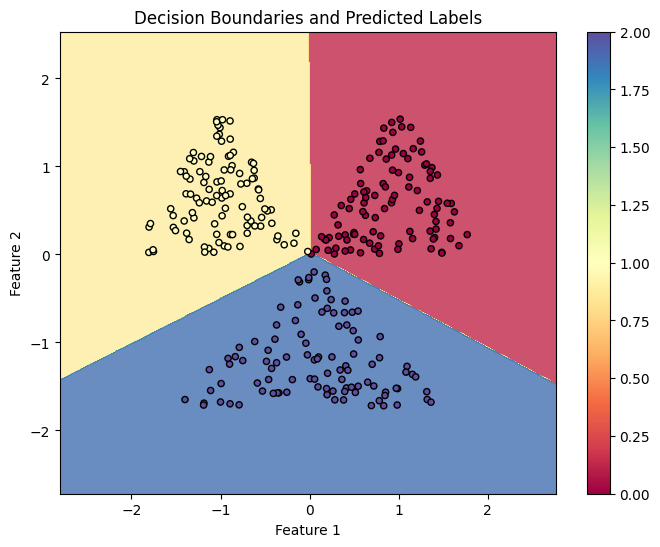

In [85]:
### Your code goes here ####
### Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


input_size = 2
num_classes = 3
epochs = 1000

model = nn.Sequential(
    nn.Linear(input_size, num_classes),
    nn.LogSoftmax(dim=1)
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train, device)
X_test_tensor, y_test_tensor = preprocess_data(X_test, y_test, device)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size= 32, shuffle=True)

model, epoch_losses = train_model(model, train_loader, criterion, optimizer, epochs, 100)

plot_training_loss(epoch_losses)

print("\n Train:")
evaluate_model(model, X_train_tensor, y_train_tensor)
plot_decision_boundaries(model, X_train_tensor, y_train_tensor)

print("\n Test:")
evaluate_model(model, X_test_tensor, y_test_tensor)
plot_decision_boundaries(model, X_test_tensor, y_test_tensor)

**explanation about how and why**

## EX2

EX2- we started the training with a linear model, after changing all the parameters we saw that the linear model does not give a good result, so we switched to a MLP model.
we started with lr = 0.3 and epochs = 1000, the classification was good, but there were jumps in the loss graph, we assume that this happened because the learning rate was relatively high and this resulted in sudden changes in loss, we decreased the learning rate and increased the epochs accordingly and got better results, both in the loss graph and in the total
accuracy of the model.

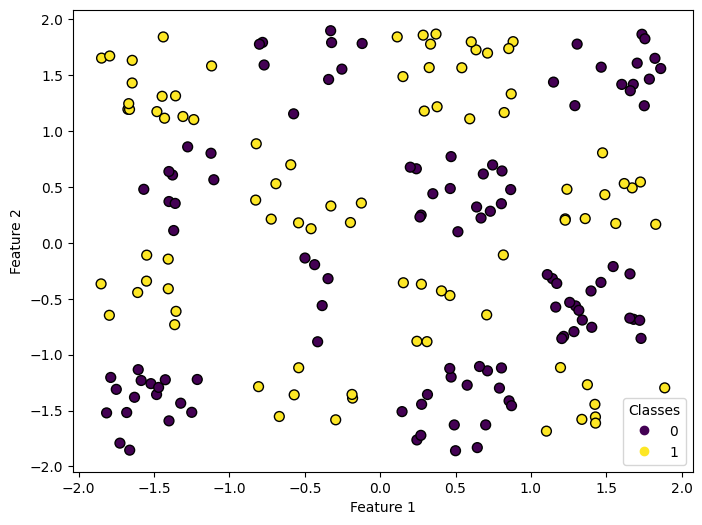

In [86]:
# Generate the data
X_train, y_train = generate_grid_data(random_state=0)
X_test, y_test = generate_grid_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

In [87]:
### defining the model ####
import torch.nn as nn

class MLP(nn.Module):

    def __init__(self, input_n, hidden, classes, layers):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_n, hidden),
            nn.ReLU()
        )
        for i in range(layers):
            self.layers.add_module(f"hidden_layer_{i + 1}", nn.Linear(hidden, hidden))
            self.layers.add_module(f"relu_{i + 1}", nn.ReLU())
        self.layers.add_module("output_layer", nn.Linear(hidden, classes))
        self.layers.add_module("softmax", nn.LogSoftmax(dim=1))


    def forward(self, x):
        return self.layers(x)

Epoch [100/20000], Loss: 0.6619
Epoch [200/20000], Loss: 0.6552
Epoch [300/20000], Loss: 0.6498
Epoch [400/20000], Loss: 0.6449
Epoch [500/20000], Loss: 0.6405
Epoch [600/20000], Loss: 0.6365
Epoch [700/20000], Loss: 0.6323
Epoch [800/20000], Loss: 0.6285
Epoch [900/20000], Loss: 0.6248
Epoch [1000/20000], Loss: 0.6211
Epoch [1100/20000], Loss: 0.6172
Epoch [1200/20000], Loss: 0.6135
Epoch [1300/20000], Loss: 0.6090
Epoch [1400/20000], Loss: 0.6035
Epoch [1500/20000], Loss: 0.5981
Epoch [1600/20000], Loss: 0.5926
Epoch [1700/20000], Loss: 0.5855
Epoch [1800/20000], Loss: 0.5788
Epoch [1900/20000], Loss: 0.5703
Epoch [2000/20000], Loss: 0.5614
Epoch [2100/20000], Loss: 0.5521
Epoch [2200/20000], Loss: 0.5420
Epoch [2300/20000], Loss: 0.5309
Epoch [2400/20000], Loss: 0.5194
Epoch [2500/20000], Loss: 0.5073
Epoch [2600/20000], Loss: 0.4943
Epoch [2700/20000], Loss: 0.4813
Epoch [2800/20000], Loss: 0.4676
Epoch [2900/20000], Loss: 0.4537
Epoch [3000/20000], Loss: 0.4401
Epoch [3100/20000],

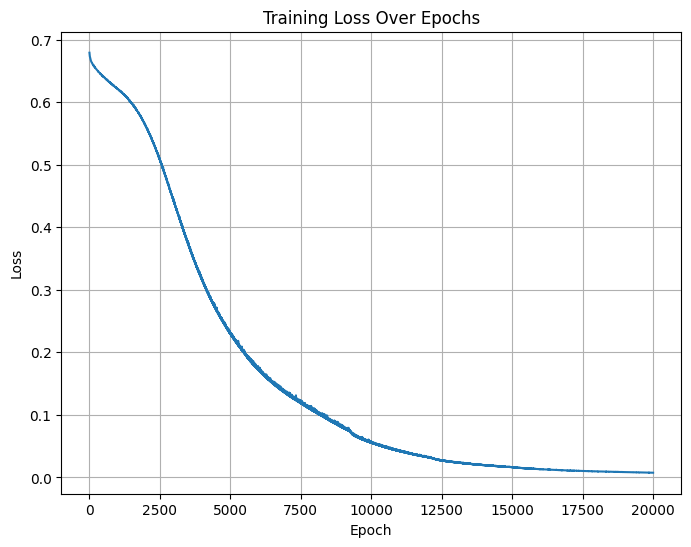


 Train:
Accuracy on the data: 100.00%


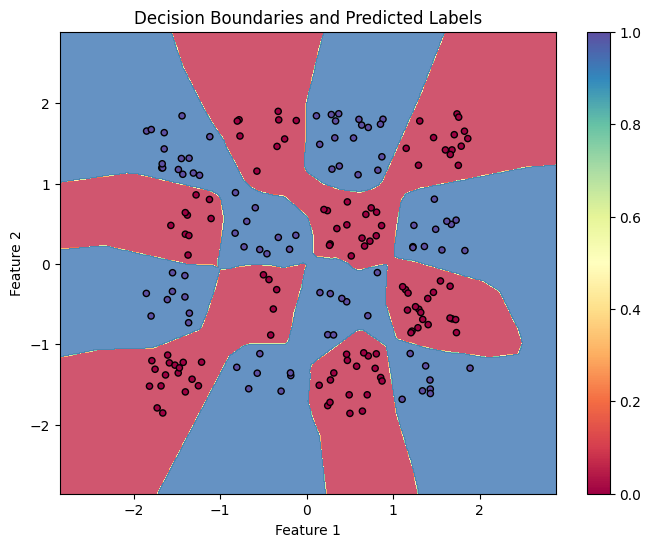


 Test:
Accuracy on the data: 96.26%


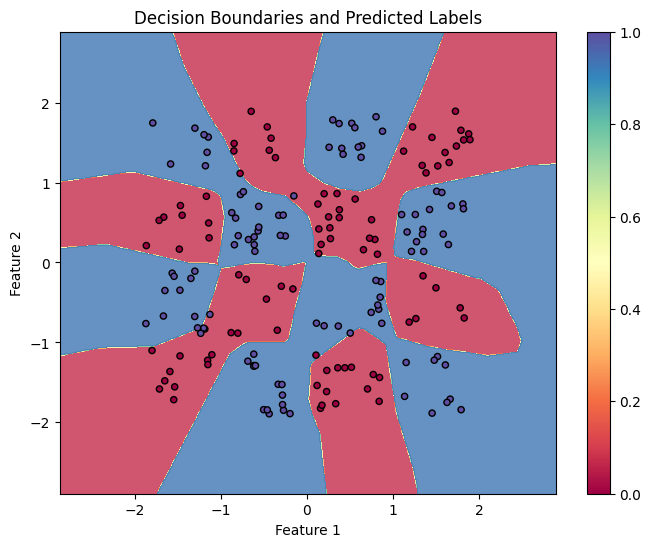

In [88]:
### Your code goes here ####
### Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

input_size = 2
hidden_sizes = 30
hidden_num = 1
num_classes = 2
epochs = 20000

model = MLP(input_size, hidden_sizes, num_classes, hidden_num)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train, device)
X_test_tensor, y_test_tensor = preprocess_data(X_test, y_test, device)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=100, shuffle=True)

model, epoch_losses = train_model(model, train_loader, criterion, optimizer, epochs, 100)

plot_training_loss(epoch_losses)

print("\n Train:")
evaluate_model(model, X_train_tensor, y_train_tensor)
plot_decision_boundaries(model, X_train_tensor, y_train_tensor)

print("\n Test:")
evaluate_model(model, X_test_tensor, y_test_tensor)
plot_decision_boundaries(model, X_test_tensor, y_test_tensor)

## EX3

EX3 - we started with an MLP model and got good results, we changed the parameters and saw that these parameters gave the best results.

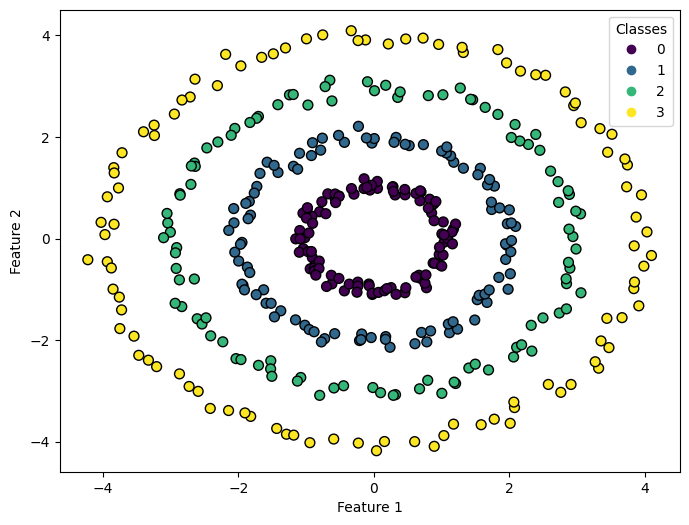

In [89]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


Epoch [100/500], Loss: 0.0114
Epoch [200/500], Loss: 0.0036
Epoch [300/500], Loss: 0.0020
Epoch [400/500], Loss: 0.0014
Epoch [500/500], Loss: 0.0010


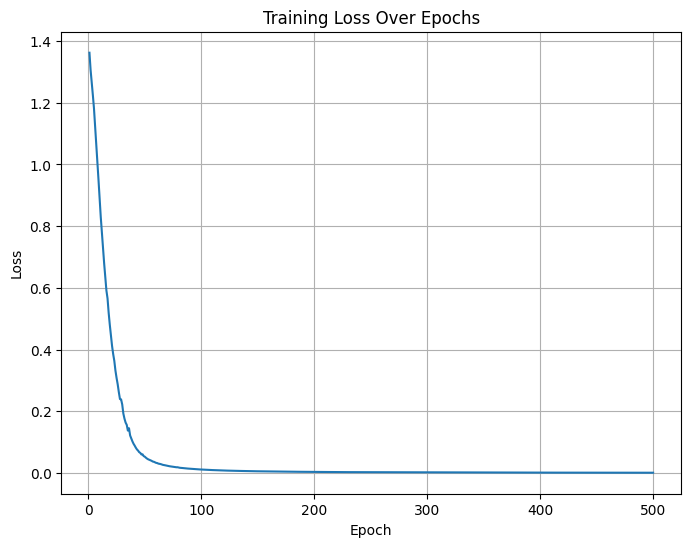


 Train:
Accuracy on the data: 100.00%


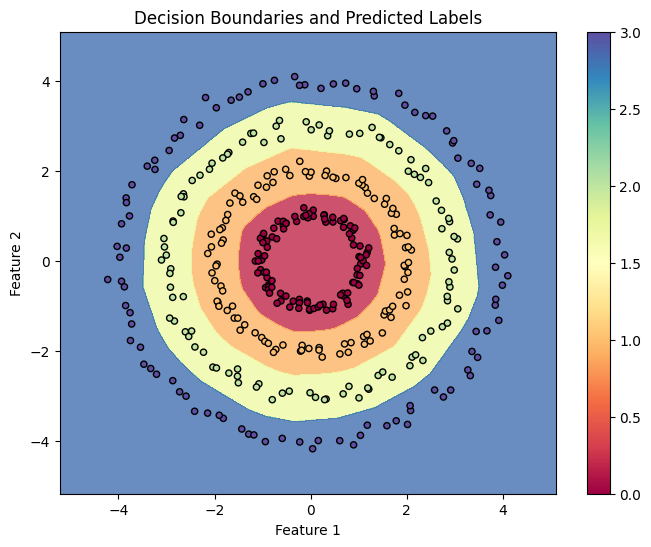


 Test:
Accuracy on the data: 100.00%


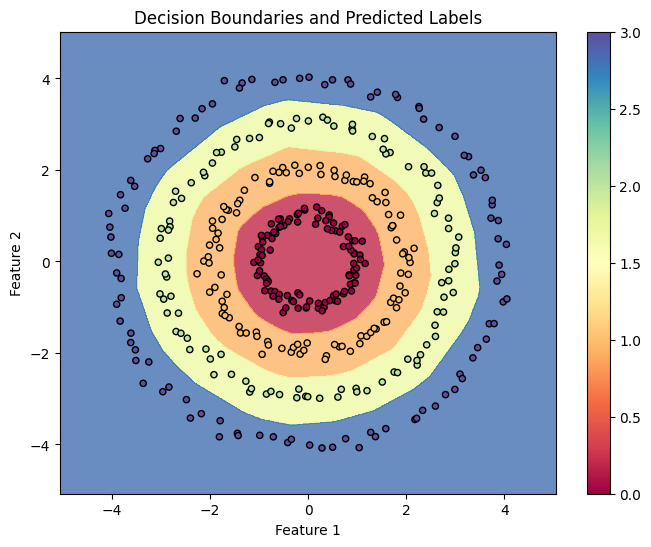

In [90]:
### Your code goes here ####
### Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

input_size = 2
hidden_sizes = 30
hidden_num = 1
num_classes = 4
epochs = 500

model = MLP(input_size, hidden_sizes, num_classes, hidden_num)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train, device)
X_test_tensor, y_test_tensor = preprocess_data(X_test, y_test, device)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=50, shuffle=True)

model, epoch_losses = train_model(model, train_loader, criterion, optimizer, epochs, 100)

plot_training_loss(epoch_losses)

print("\n Train:")
evaluate_model(model, X_train_tensor, y_train_tensor)
plot_decision_boundaries(model, X_train_tensor, y_train_tensor)

print("\n Test:")
evaluate_model(model, X_test_tensor, y_test_tensor)
plot_decision_boundaries(model, X_test_tensor, y_test_tensor)

## EX4

EX4 - we started with the MLP model with the EX3 parameters, the classification was poor and the loss did not converge, so we decreased the learning rate and increased the epoch and got better results.

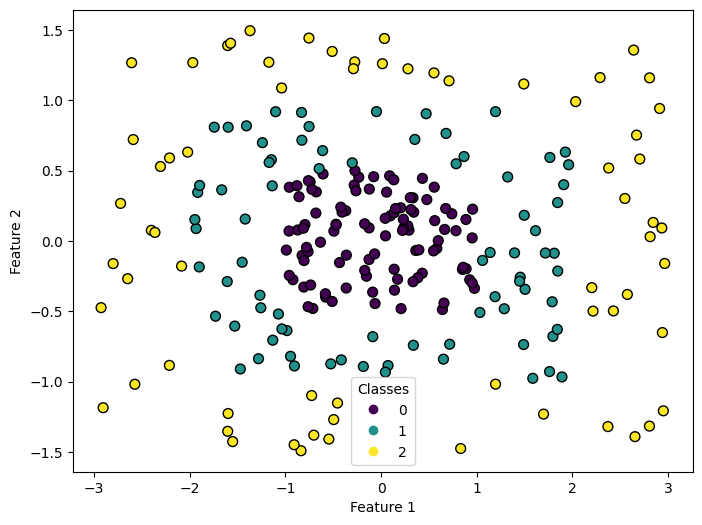

In [91]:
# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

Epoch [100/10000], Loss: 0.9180
Epoch [200/10000], Loss: 0.7188
Epoch [300/10000], Loss: 0.5477
Epoch [400/10000], Loss: 0.4050
Epoch [500/10000], Loss: 0.3023
Epoch [600/10000], Loss: 0.2331
Epoch [700/10000], Loss: 0.1880
Epoch [800/10000], Loss: 0.1575
Epoch [900/10000], Loss: 0.1361
Epoch [1000/10000], Loss: 0.1203
Epoch [1100/10000], Loss: 0.1080
Epoch [1200/10000], Loss: 0.0984
Epoch [1300/10000], Loss: 0.0901
Epoch [1400/10000], Loss: 0.0827
Epoch [1500/10000], Loss: 0.0771
Epoch [1600/10000], Loss: 0.0723
Epoch [1700/10000], Loss: 0.0673
Epoch [1800/10000], Loss: 0.0630
Epoch [1900/10000], Loss: 0.0595
Epoch [2000/10000], Loss: 0.0567
Epoch [2100/10000], Loss: 0.0532
Epoch [2200/10000], Loss: 0.0503
Epoch [2300/10000], Loss: 0.0477
Epoch [2400/10000], Loss: 0.0456
Epoch [2500/10000], Loss: 0.0434
Epoch [2600/10000], Loss: 0.0419
Epoch [2700/10000], Loss: 0.0402
Epoch [2800/10000], Loss: 0.0383
Epoch [2900/10000], Loss: 0.0369
Epoch [3000/10000], Loss: 0.0356
Epoch [3100/10000],

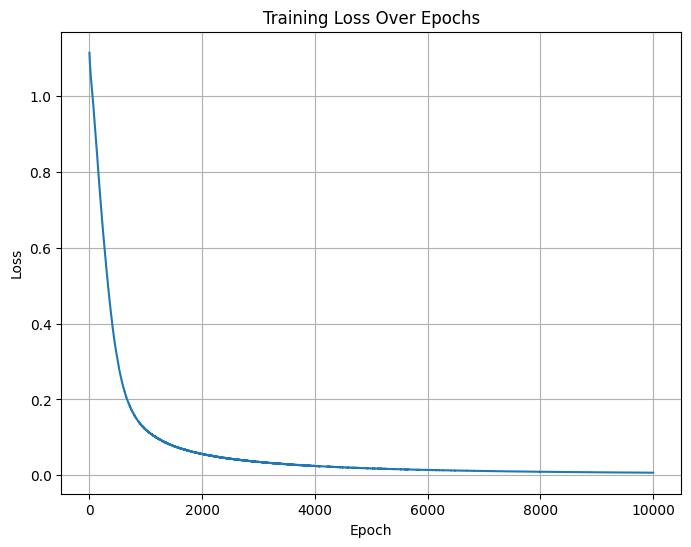


 Train:
Accuracy on the data: 100.00%


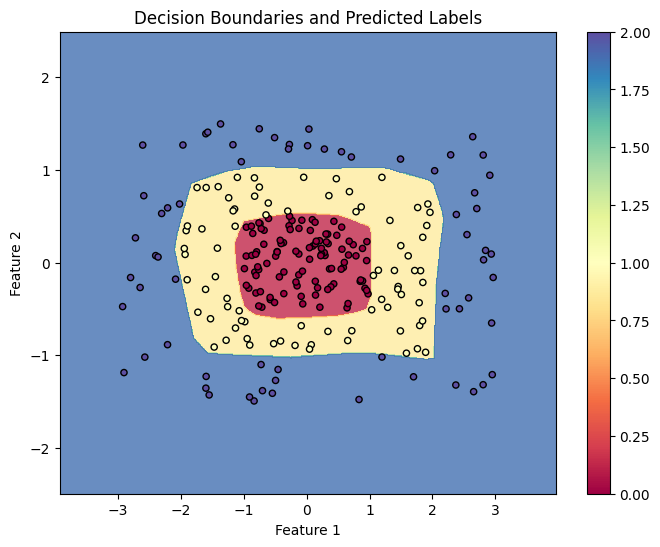


 Test:
Accuracy on the data: 96.07%


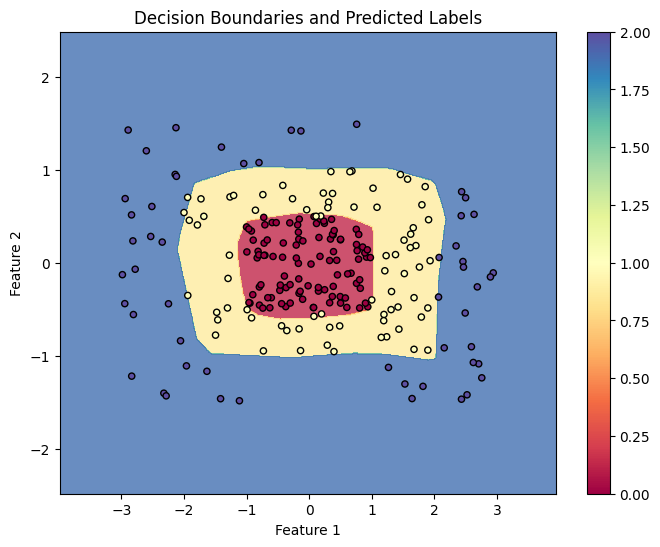

In [92]:
### Your code goes here ####
### Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

input_size = 2
hidden_sizes = 30
hidden_num = 1
num_classes = 3
epochs = 10000

model = MLP(input_size, hidden_sizes, num_classes, hidden_num)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train, device)
X_test_tensor, y_test_tensor = preprocess_data(X_test, y_test, device)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=50, shuffle=True)

model, epoch_losses = train_model(model, train_loader, criterion, optimizer, epochs, 100)

plot_training_loss(epoch_losses)

print("\n Train:")
evaluate_model(model, X_train_tensor, y_train_tensor)
plot_decision_boundaries(model, X_train_tensor, y_train_tensor)

print("\n Test:")
evaluate_model(model, X_test_tensor, y_test_tensor)
plot_decision_boundaries(model, X_test_tensor, y_test_tensor)

## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

EX5 - after determining the data dimensions, we tried the linear model, but the results were not good. We used the MLP model, changed the parameters and got better results.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(600, 5)
(600,)
(600, 5)
(600,)


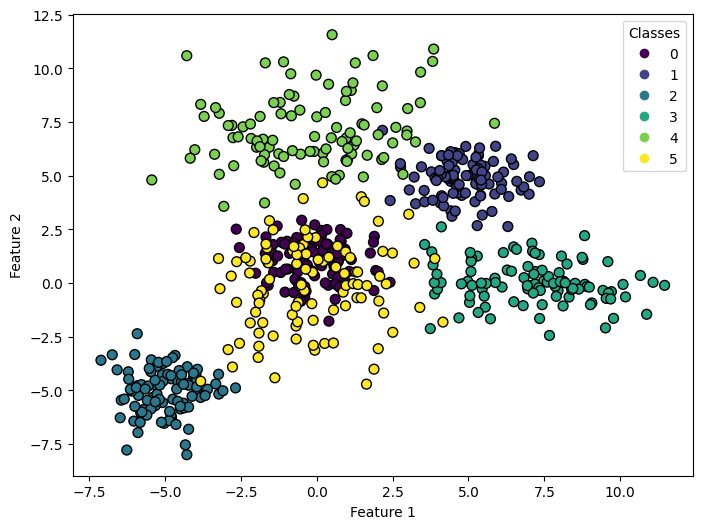

In [96]:
### Your code goes here ####
## Mount google drive ##
from google.colab import drive
drive.mount('/content/drive')
## load numpy array using np.load() ##
X_test = np.load('drive/My Drive/ex5_data/X_test.npy')
y_test = np.load('drive/My Drive/ex5_data/y_test.npy')
print(X_test.shape)
print(y_test.shape)
X_train = np.load('drive/My Drive/ex5_data/X_train.npy')
y_train = np.load('drive/My Drive/ex5_data/y_train.npy')
print(X_train.shape)
print(y_train.shape)
plot_data(X_train, y_train)

Epoch [100/500], Loss: 0.0063
Epoch [200/500], Loss: 0.0017
Epoch [300/500], Loss: 0.0009
Epoch [400/500], Loss: 0.0005
Epoch [500/500], Loss: 0.0004


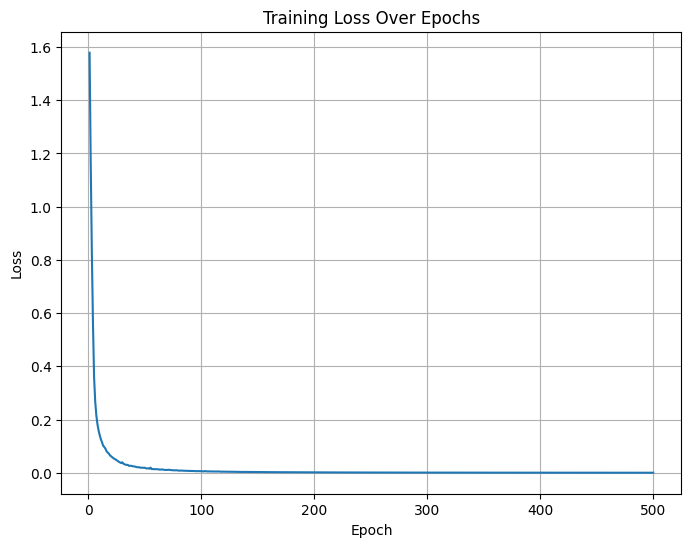


 Train:
Accuracy on the data: 100.00%

 Test:
Accuracy on the data: 97.50%


In [97]:
### Your code goes here ####
### Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

input_size = 5
hidden_sizes = 16
hidden_num = 2
num_classes = 6
epochs = 500

model = MLP(input_size, hidden_sizes, num_classes, hidden_num)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train, device)
X_test_tensor, y_test_tensor = preprocess_data(X_test, y_test, device)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=50, shuffle=True)

model, epoch_losses = train_model(model, train_loader, criterion, optimizer, epochs, 100)

plot_training_loss(epoch_losses)

print("\n Train:")
evaluate_model(model, X_train_tensor, y_train_tensor)

print("\n Test:")
evaluate_model(model, X_test_tensor, y_test_tensor)

#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [98]:
from sklearn.datasets import make_s_curve
### EX7
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()


### EX8
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX9
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [99]:
### Your code goes here ###
### Imports

### Preprocessing function ####
def preprocess_data(x, y, device):
    x_tensor = torch.tensor(x, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1).to(device)  # Ensure y is a column tensor
    return x_tensor, y_tensor

### Evaluation function ###
def evaluate_model(model, X_tensor, y_tensor):
    model.eval()
    with torch.no_grad():
        predictions = model(X_tensor)
        mse = torch.mean((predictions - y_tensor)**2).item()
    print(f'Mean Squared Error: {mse:.4f}')

### Additional plotting functions ###
def plot_predicted_values(model, X, y_true, title):
    model.eval()

    # Convert X and y_true to PyTorch tensors if they are not already
    if not isinstance(X, torch.Tensor):
        X = torch.tensor(X, dtype=torch.float32)
    if not isinstance(y_true, torch.Tensor):
        y_true = torch.tensor(y_true)

    # Move tensors to the same device as the model
    device = next(model.parameters()).device  # Get device of the model's parameters
    X = X.to(device)
    y_true = y_true.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(X)
        y_pred = outputs.cpu().numpy().flatten()  # Move predictions to CPU and convert to NumPy array

    # Compute MSE loss
    y_true_np = y_true.cpu().numpy()  # Move y_true to CPU and convert to NumPy array
    mse_loss = np.mean((y_pred - y_true_np)**2)

    # Plot true and predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(X.cpu().numpy()[:, 0], X.cpu().numpy()[:, 1], c=y_true_np, cmap=plt.cm.Spectral, edgecolors='k', label='True')
    plt.scatter(X.cpu().numpy()[:, 0], X.cpu().numpy()[:, 1], c=y_pred, cmap=plt.cm.Spectral, marker='x', s=50, label='Predicted')
    plt.colorbar()
    plt.title(f'{title} (MSE: {mse_loss:.3f})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


def plot_predicted_values_3d(model, X, y_true, title='3D Spiral with Predictions'):
    model.eval()

    # Convert X and y_true to PyTorch tensors if they are not already
    if not isinstance(X, torch.Tensor):
        X = torch.tensor(X, dtype=torch.float32)
    if not isinstance(y_true, torch.Tensor):
        y_true = torch.tensor(y_true)

    # Move tensors to the same device as the model
    device = next(model.parameters()).device  # Get device of the model's parameters
    X = X.to(device)
    y_true = y_true.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(X)
        y_pred = outputs.cpu().numpy().flatten()  # Move predictions to CPU and convert to NumPy array

    # Plotting
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X.cpu().numpy()[:, 0], X.cpu().numpy()[:, 1], X.cpu().numpy()[:, 2], c=y_true.cpu().numpy(), cmap='viridis', edgecolor='k', label='True')
    ax.scatter(X.cpu().numpy()[:, 0], X.cpu().numpy()[:, 1], X.cpu().numpy()[:, 2], c=y_pred, cmap='viridis', marker='x', s=50, label='Predicted')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(plt.cm.ScalarMappable(norm=None, cmap='viridis'), ax=ax, label='Label')
    ax.legend()

    plt.show()

## EX6

EX6 - The model worked well, had high accuracy (about 99%) in all runs, and was relatively fast. The most important point in this ex was that we decided that there had to be a large number of neurons and only one hidden layer. This allowed the model to better understand which patterns to learn.

In [100]:
### defining the model ####
import torch.nn as nn

class MLP(nn.Module):

    def __init__(self, input_n, hidden, classes, layers):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_n, hidden),
            nn.ReLU()
        )
        for i in range(layers):
            self.layers.add_module(f"hidden_layer_{i + 1}", nn.Linear(hidden, hidden))
            self.layers.add_module(f"relu_{i + 1}", nn.ReLU())
        self.layers.add_module("output_layer", nn.Linear(hidden, classes))


    def forward(self, x):
        return self.layers(x)

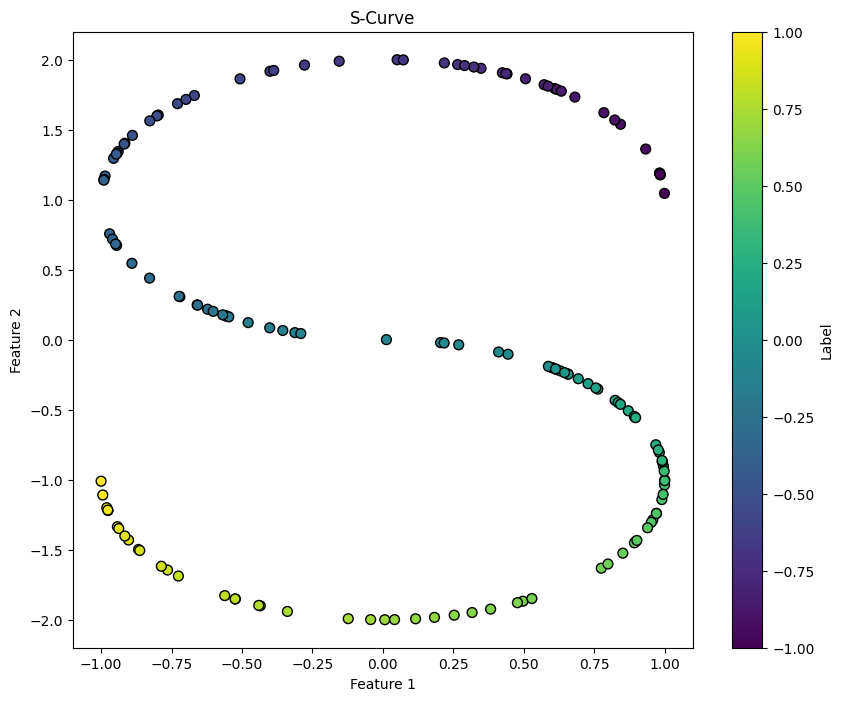

In [101]:
# Generate the data
X_train, theta_train = generate_s_curve_data(random_state=0)
X_test, theta_test = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, theta_train)
y_test = create_labels_s_curve(X_test, theta_test)

# Plot the data
plot_s_curve(X_train, y_train)

Epoch [100/1000], Loss: 0.0082
Epoch [200/1000], Loss: 0.0046
Epoch [300/1000], Loss: 0.0028
Epoch [400/1000], Loss: 0.0019
Epoch [500/1000], Loss: 0.0013
Epoch [600/1000], Loss: 0.0010
Epoch [700/1000], Loss: 0.0008
Epoch [800/1000], Loss: 0.0007
Epoch [900/1000], Loss: 0.0006
Epoch [1000/1000], Loss: 0.0005


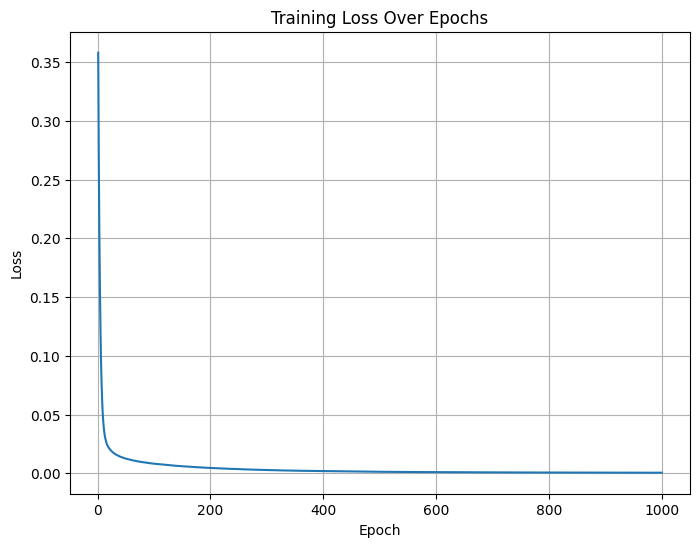


 Train:
Mean Squared Error: 0.0005


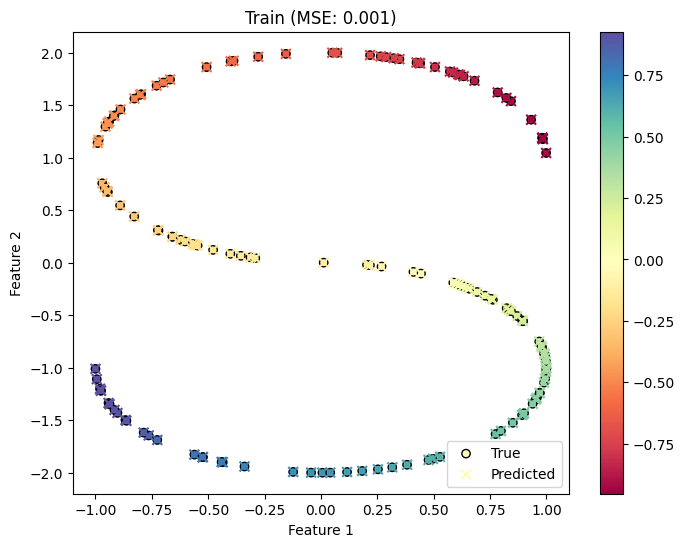


 Test:
Mean Squared Error: 0.0096


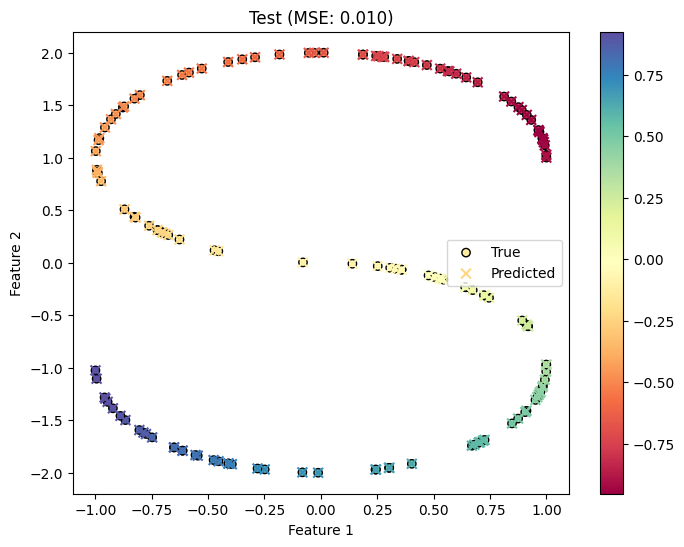

In [102]:
### Your code goes here ####
### Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

input_size = X_train.shape[1]
hidden_sizes = 100
hidden_num = 1
num_classes = 1
epochs = 1000

model = MLP(input_size, hidden_sizes, num_classes, hidden_num)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train, device)
X_test_tensor, y_test_tensor = preprocess_data(X_test, y_test, device)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=50, shuffle=True)

model, epoch_losses = train_model(model, train_loader, criterion, optimizer, epochs, 100)

plot_training_loss(epoch_losses)

print("\n Train:")
evaluate_model(model, X_train_tensor, y_train_tensor)
plot_predicted_values(model, X_train, y_train, "Train")

print("\n Test:")
evaluate_model(model, X_test_tensor, y_test_tensor)
plot_predicted_values(model, X_test, y_test, "Test")

## EX7

EX7 - As in Ex6, the same considerations were made in the parameter decisions and model design (one broad layer).

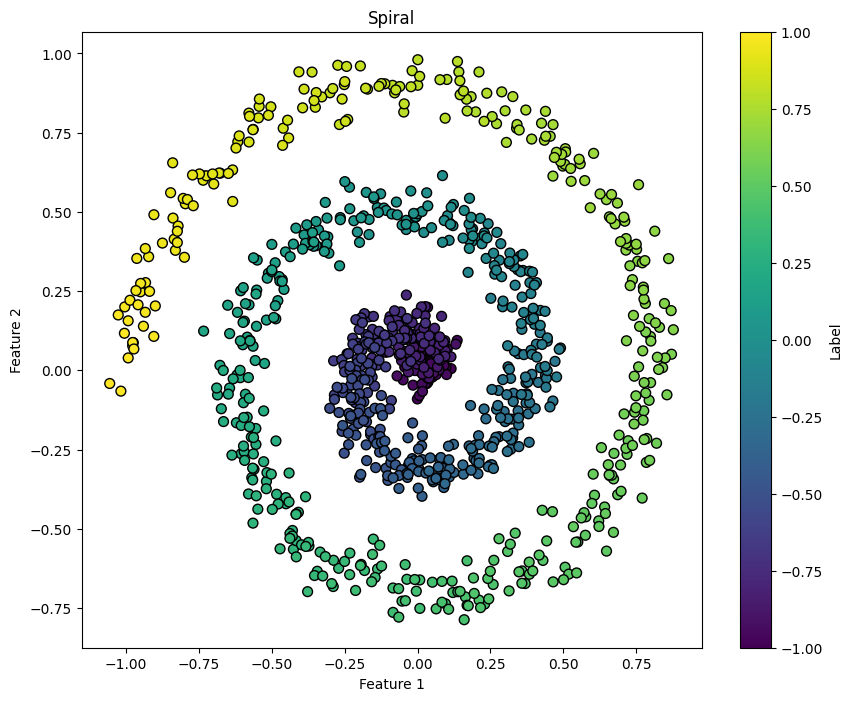

In [103]:
# Generate the data
X_train, theta_train = generate_spiral_data(random_state=0)
X_test, theta_test = generate_spiral_data(random_state=1)
# Create the labels
y_train = create_labels_spiral(theta_train)
y_test = create_labels_spiral(theta_test)
# Plot the data
plot_spiral(X_train, y_train)


Epoch [100/1000], Loss: 0.0091
Epoch [200/1000], Loss: 0.0083
Epoch [300/1000], Loss: 0.0080
Epoch [400/1000], Loss: 0.0078
Epoch [500/1000], Loss: 0.0077
Epoch [600/1000], Loss: 0.0076
Epoch [700/1000], Loss: 0.0075
Epoch [800/1000], Loss: 0.0075
Epoch [900/1000], Loss: 0.0074
Epoch [1000/1000], Loss: 0.0073


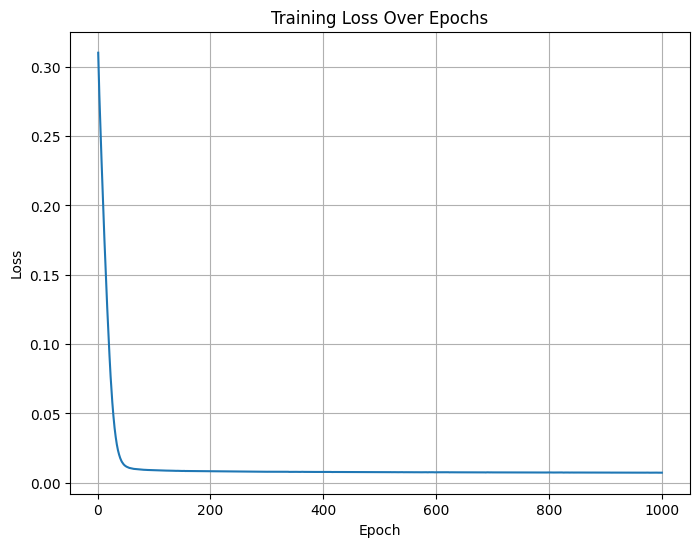


 Train:
Mean Squared Error: 0.0073


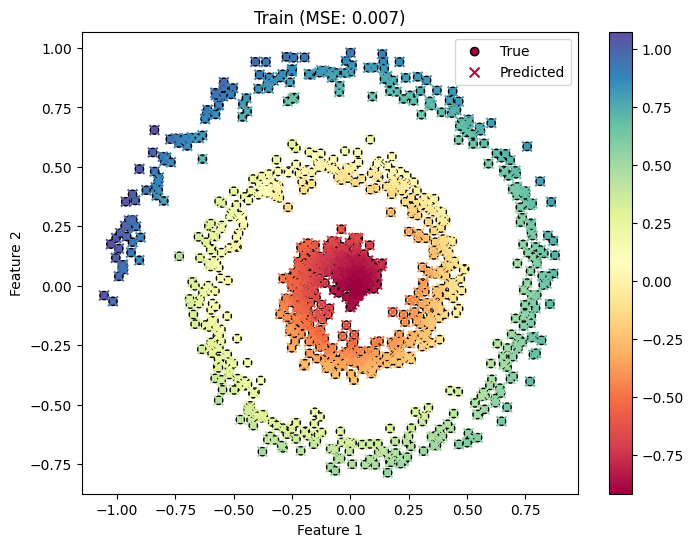


 Test:
Mean Squared Error: 0.0088


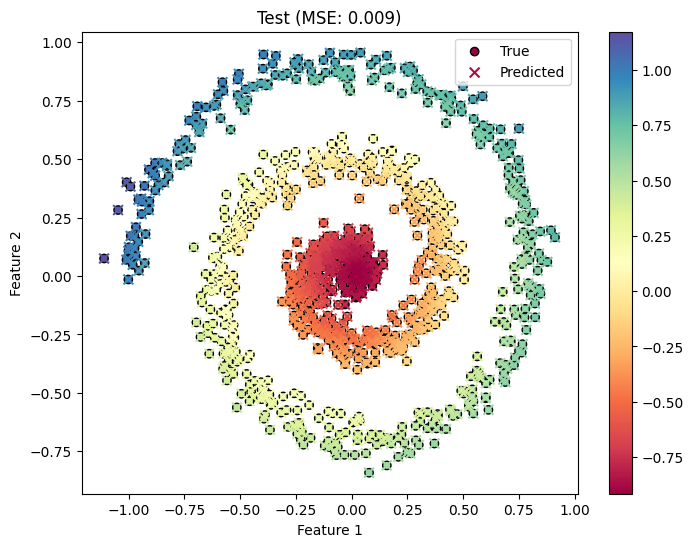

In [104]:
### Your code goes here ####
### Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

input_size = X_train.shape[1]
hidden_sizes = 100
hidden_num = 1
num_classes = 1
epochs = 1000

model = MLP(input_size, hidden_sizes, num_classes, hidden_num)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train, device)
X_test_tensor, y_test_tensor = preprocess_data(X_test, y_test, device)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=50, shuffle=True)

model, epoch_losses = train_model(model, train_loader, criterion, optimizer, epochs, 100)

plot_training_loss(epoch_losses)

print("\n Train:")
evaluate_model(model, X_train_tensor, y_train_tensor)
plot_predicted_values(model, X_train, y_train, "Train")

print("\n Test:")
evaluate_model(model, X_test_tensor, y_test_tensor)
plot_predicted_values(model, X_test, y_test, "Test")

## EX8

EX8 - As in Ex6 and Ex7, the same considerations were made in the parameter decisions and model design (a broad layer). In this case, we used fewer epochs as the model performed well overall.


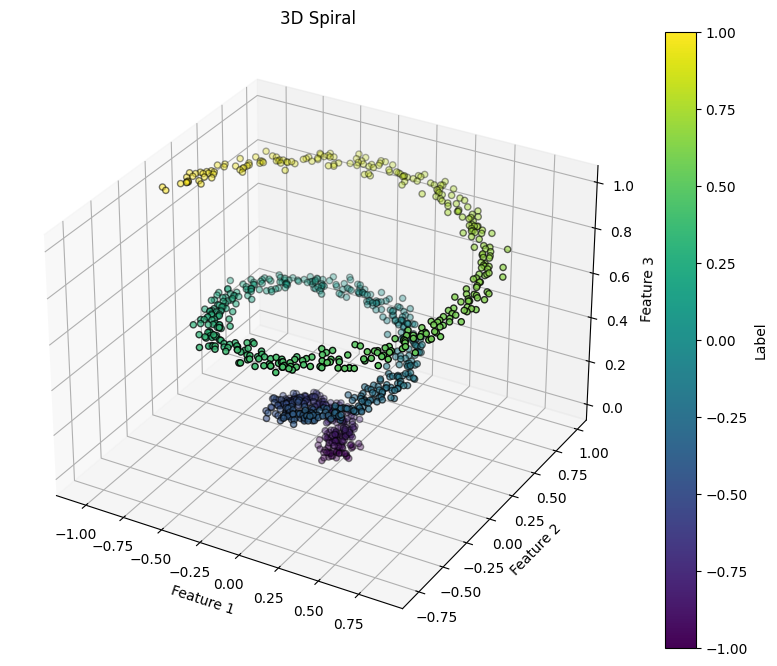

In [105]:
# Generate the data
X_train, theta_train = generate_spiral_data_3d(random_state=0)
X_test, theta_test = generate_spiral_data_3d(random_state=1)

# Create the labels
y_train = create_labels_3d_spiral(theta_train)
y_test = create_labels_3d_spiral(theta_test)

# Plot the data
plot_spiral_3d(X_train, y_train)

Epoch [100/200], Loss: 0.0005
Epoch [200/200], Loss: 0.0003


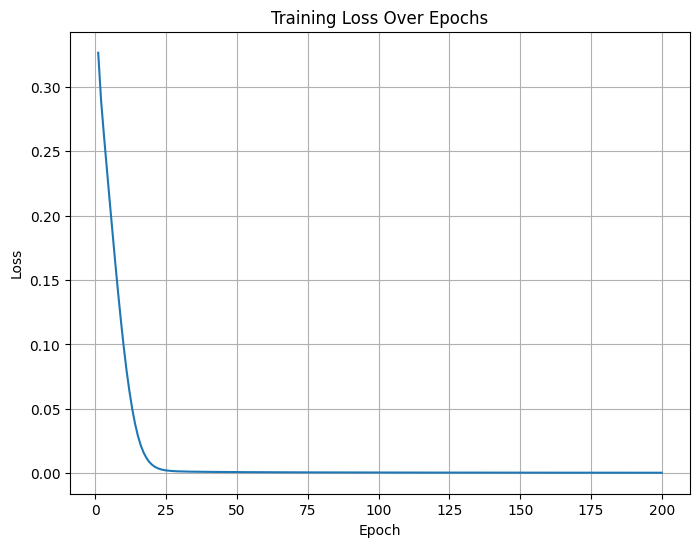


 Train:
Mean Squared Error: 0.0003


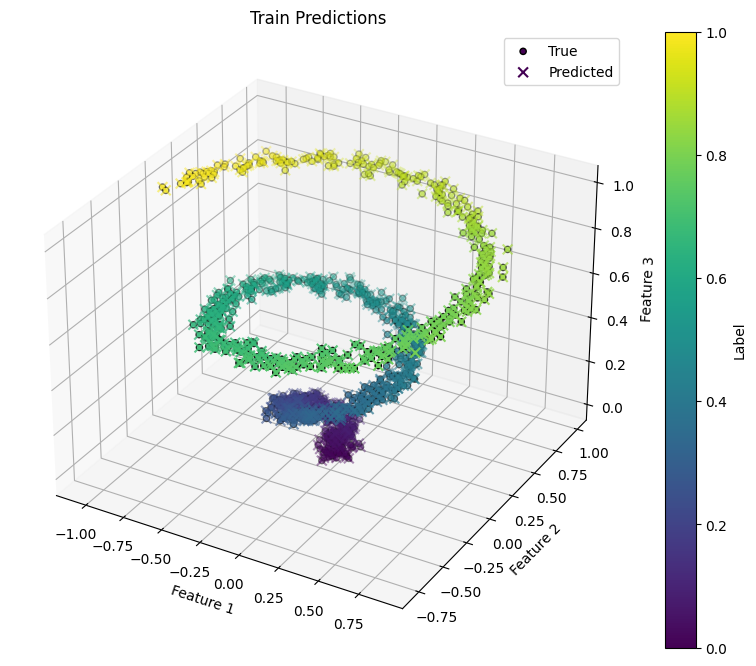


 Test:
Mean Squared Error: 0.0004


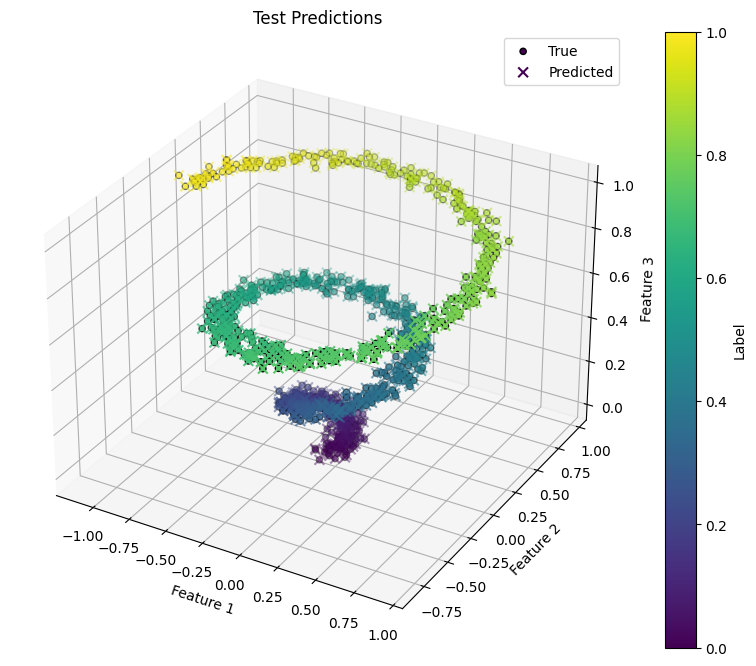

In [106]:
### Your code goes here ####
### Imports
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

input_size = X_train.shape[1]
hidden_sizes = 100
hidden_num = 1
num_classes = 1
epochs = 200

model = MLP(input_size, hidden_sizes, num_classes, hidden_num)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

X_train_tensor, y_train_tensor = preprocess_data(X_train, y_train, device)
X_test_tensor, y_test_tensor = preprocess_data(X_test, y_test, device)
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=50, shuffle=True)

model, epoch_losses = train_model(model, train_loader, criterion, optimizer, epochs, 100)

plot_training_loss(epoch_losses)

print("\n Train:")
evaluate_model(model, X_train_tensor, y_train_tensor)
plot_predicted_values_3d(model, X_train, y_train, "Train Predictions")

print("\n Test:")
evaluate_model(model, X_test_tensor, y_test_tensor)
plot_predicted_values_3d(model, X_test, y_test, "Test Predictions")

# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.

EX9 - The model did converge with great accuracy. It did not overfit in the runs we did.
There were several parameter considerations in this exercise:
First, the data normalization (a must in this ex, compared to the previous ones) to a 28*28 input, as well as the input size.
Also, the size (128 neurons) and number (3) of hidden layers so that the model can learn in a broad way and add some complexity, and thus, it can recognize more complex patterns.
Last but not least, the learning rate in this ex-model is very low (0.0001), so that the model develops a deep understanding of the obtained data in each epoch, making each learning run more effective.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler

In [108]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('data', train=False, download=True, transform=transform)

digit1 = 3
digit2 = 8

# Filter train set and convert labels to binary (0 or 1)
train_indices = torch.logical_or(train_dataset.targets == digit1, train_dataset.targets == digit2)
train_dataset.targets = (train_dataset.targets[train_indices] == digit2).long()  # Convert to 0 and 1
train_dataset.data = train_dataset.data[train_indices]

# Filter test set and convert labels to binary (0 or 1)
test_indices = torch.logical_or(test_dataset.targets == digit1, test_dataset.targets == digit2)
test_dataset.targets = (test_dataset.targets[test_indices] == digit2).long()  # Convert to 0 and 1
test_dataset.data = test_dataset.data[test_indices]

# Create validation set from training set
validation_split = 0.2
dataset_size = len(train_dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

np.random.seed(42)
np.random.shuffle(indices)

train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)



In [109]:
class MLP(nn.Module):

    def __init__(self, input_n, hidden, classes, layers):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_n, hidden),
            nn.ReLU()
        )
        for i in range(layers):
            self.layers.add_module(f"hidden_layer_{i + 1}", nn.Linear(hidden, hidden))
            self.layers.add_module(f"relu_{i + 1}", nn.ReLU())
        self.layers.add_module("output_layer", nn.Linear(hidden, classes))

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.layers(x)

In [110]:

def train_model(model, train_loader, val_loader, device, epochs, lr):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.float().view(-1, 1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            predicted = (outputs >= 0.5).squeeze().long()
            correct_train += predicted.eq(labels).sum().item()
            total_train += labels.size(0)

        train_losses.append(train_loss / len(train_loader))
        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.float().view(-1, 1))
                val_loss += loss.item()

                predicted = (outputs >= 0.5).squeeze().long()
                correct_val += predicted.eq(labels).sum().item()
                total_val += labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, device, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs >= 0.5).squeeze().long()  # Convert probabilities to binary predictions
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return accuracy

def plot_accuracy(train_accuracies, val_accuracies):
    plt.plot(train_accuracies, label='Training accuracy')
    plt.plot(val_accuracies, label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

import torch
import matplotlib.pyplot as plt

def plot_predictions(model, test_loader, class_names):
    model.eval()
    model.to('cpu')
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to('cpu')
            labels = labels.to('cpu')
            outputs = model(inputs)
            outputs = outputs.cpu()
            predicted = (outputs >= 0.5).squeeze().long()
            plt.figure(figsize=(10, 4))
            for i in range(10):
                plt.subplot(2, 5, i + 1)
                plt.imshow(inputs[i].squeeze(), cmap='gray')
                plt.axis('off')
                plt.title(f'Pred: {class_names[predicted[i]]}, Actual: {class_names[labels[i]]}')
            plt.tight_layout()
            plt.show()
            break



Epoch 1/40, Train Loss: 0.3906, Val Loss: 0.1475, Train Acc: 0.7666, Val Acc: 0.9361
Epoch 2/40, Train Loss: 0.1252, Val Loss: 0.1152, Train Acc: 0.9532, Val Acc: 0.9578
Epoch 3/40, Train Loss: 0.1067, Val Loss: 0.1152, Train Acc: 0.9631, Val Acc: 0.9645
Epoch 4/40, Train Loss: 0.0981, Val Loss: 0.0954, Train Acc: 0.9667, Val Acc: 0.9691
Epoch 5/40, Train Loss: 0.0930, Val Loss: 0.0895, Train Acc: 0.9690, Val Acc: 0.9716
Epoch 6/40, Train Loss: 0.0831, Val Loss: 0.0814, Train Acc: 0.9728, Val Acc: 0.9745
Epoch 7/40, Train Loss: 0.0766, Val Loss: 0.0783, Train Acc: 0.9751, Val Acc: 0.9737
Epoch 8/40, Train Loss: 0.0679, Val Loss: 0.0802, Train Acc: 0.9783, Val Acc: 0.9695
Epoch 9/40, Train Loss: 0.0599, Val Loss: 0.0666, Train Acc: 0.9812, Val Acc: 0.9745
Epoch 10/40, Train Loss: 0.0523, Val Loss: 0.0558, Train Acc: 0.9827, Val Acc: 0.9812
Epoch 11/40, Train Loss: 0.0442, Val Loss: 0.0566, Train Acc: 0.9862, Val Acc: 0.9787
Epoch 12/40, Train Loss: 0.0374, Val Loss: 0.0485, Train Acc: 0

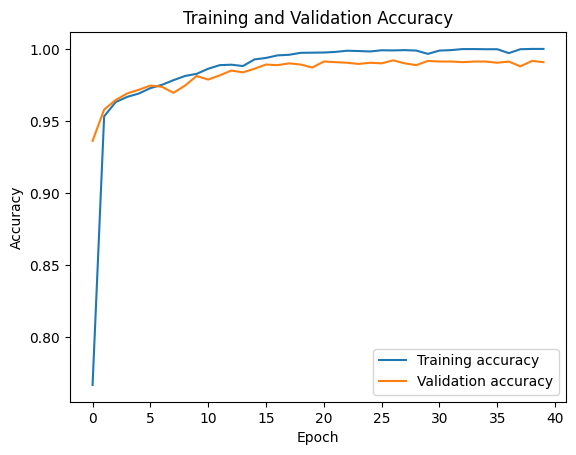

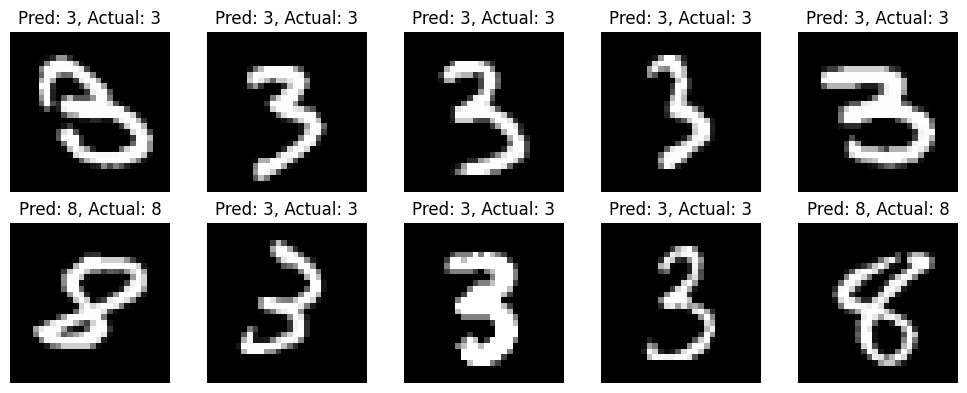

In [111]:
#Settings
input_size = 28 * 28
hidden_size = 128
num_classes = 1
num_layers = 3
epochs = 40
lr = 0.0001
batch_size = 64
device = "cuda"

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Model
model = MLP(input_size, hidden_size, num_classes, num_layers)
model = model.to(device)

#Training
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, device, epochs,lr)

#Plotting
plot_accuracy(train_accuracies, val_accuracies)
class_names = [str(digit1), str(digit2)]
plot_predictions(model, test_loader, class_names)

